In [1]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import pandas as pd
import numpy as np


In [3]:
pd.set_option('display.max_columns', None)

train_df = pd.read_csv('DATA/train.csv')
test_df = pd.read_csv('DATA/test.csv')
submission_sample = pd.read_csv('DATA/sample_submission.csv')

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Alley column - Lets see if there is any corolation between the sales price and Alley access with the house

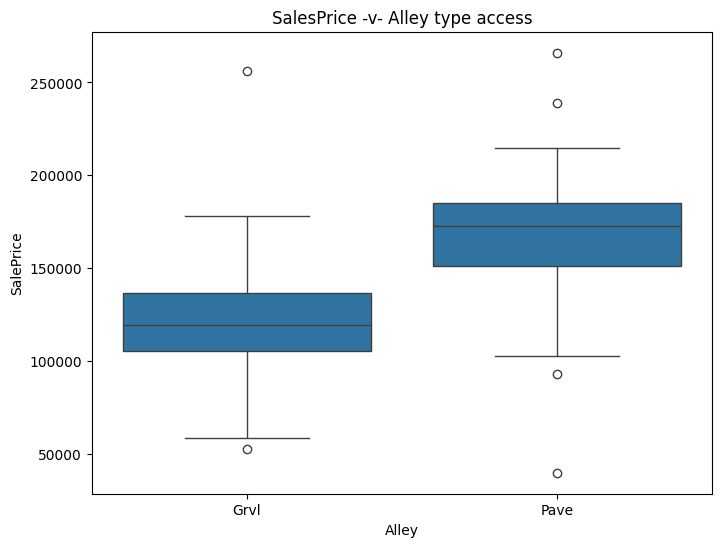

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

alley_price_comparison = train_df.groupby('Alley')['SalePrice'].mean()
#Boxplot chart to see SalesPrice distribution amoungst alley types
plt.figure(figsize=(8,6))
sns.boxplot(data=train_df, x='Alley', y='SalePrice')
plt.title('SalesPrice -v- Alley type access')
plt.show()

LotFrontage column Nulls dealt with as the average figure for that column

Paved Alley access does seem to increase the average value of the property, so we will keep the column but replace the nulls with 'None'

Now lets anaylze the BsmtQual column to see if Basement quality has an effect on the SalesPrice

In [7]:
bsmtqual = train_df.groupby('BsmtQual')['SalePrice'].mean()
print(bsmtqual)

BsmtQual
Ex    327041.041322
Fa    115692.028571
Gd    202688.478964
TA    140759.818182
Name: SalePrice, dtype: float64


Analyzing the Electrics column

In [8]:
electrics = train_df.groupby('Electrical')['SalePrice'].mean()
print(electrics)

Electrical
FuseA    122196.893617
FuseF    107675.444444
FuseP     97333.333333
Mix       67000.000000
SBrkr    186825.113193
Name: SalePrice, dtype: float64


In [9]:
train_df.dropna(subset=['Electrical'], inplace=True)

In [10]:
fireplaces = train_df.groupby('FireplaceQu')['SalePrice'].mean()
print(fireplaces)

FireplaceQu
Ex    337712.500000
Fa    167298.484848
Gd    226351.415789
Po    129764.150000
TA    205723.488818
Name: SalePrice, dtype: float64


In [11]:
train_df.fillna({'FireplaceQu':'None'}, inplace=True)

Visualize the correlation between the SalesPrices of homes against the property having a garage or not

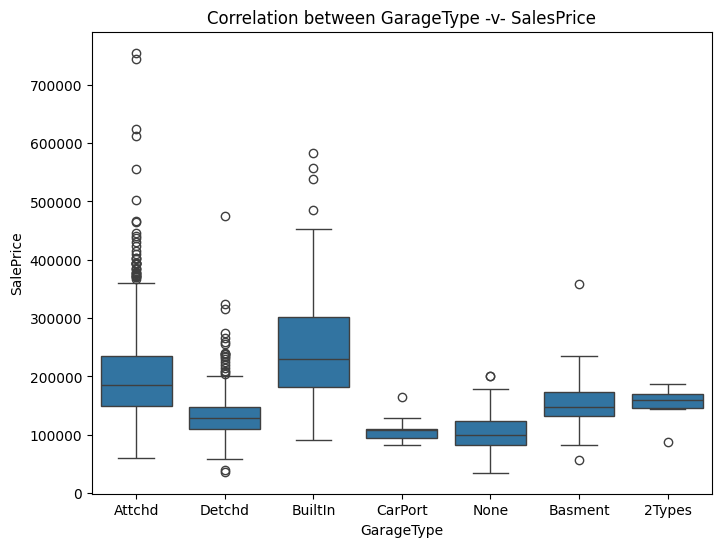

In [12]:
train_df.fillna({'GarageType':'None'}, inplace=True)

plt.figure(figsize=(8,6))
sns.boxplot(data=train_df, x='GarageType', y='SalePrice')
plt.title('Correlation between GarageType -v- SalesPrice')

plt.show()

In [13]:
train_df['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

Analyze what effect the year the garage was bult against price

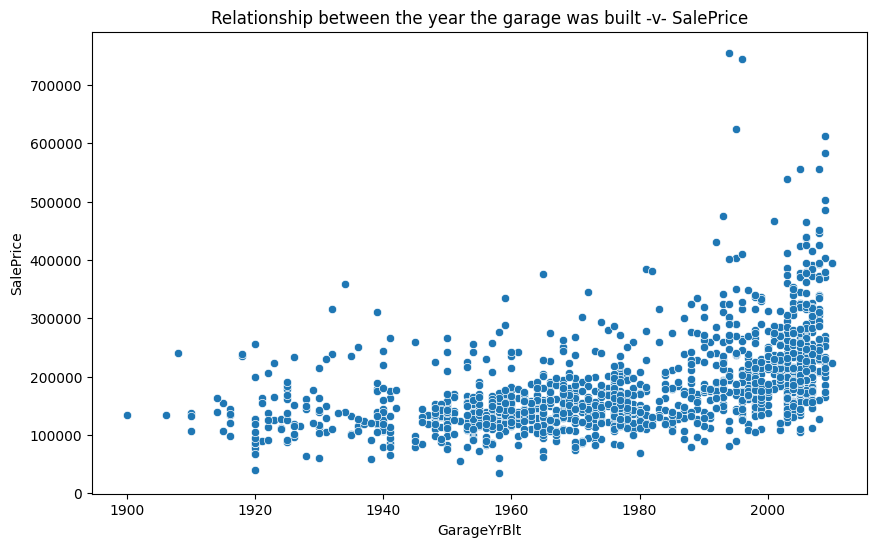

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=train_df, x='GarageYrBlt', y='SalePrice')
plt.title('Relationship between the year the garage was built -v- SalePrice')
plt.show()

In my view correlation is week so will drop the GarageYrBlt column

In [15]:
train_df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

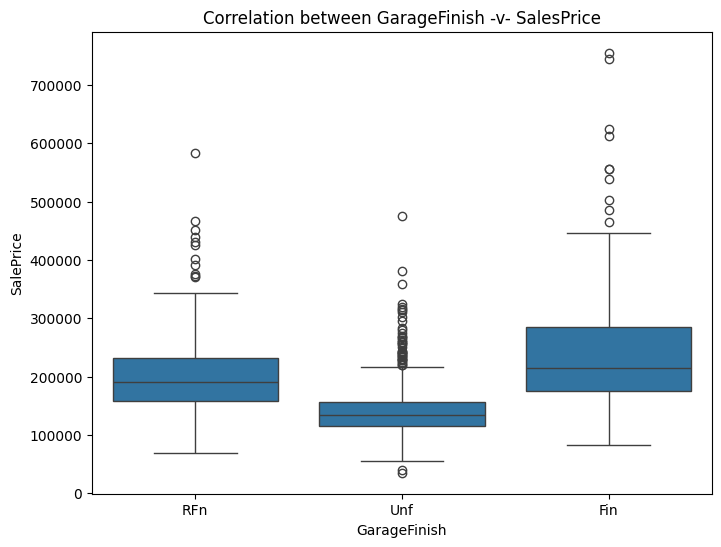

In [16]:
 
plt.figure(figsize=(8,6))
sns.boxplot(data=train_df, x='GarageFinish', y='SalePrice')
plt.title('Correlation between GarageFinish -v- SalesPrice')

plt.show()

Set all the other nulls in the other Garage finish, quality and condition to 'None'

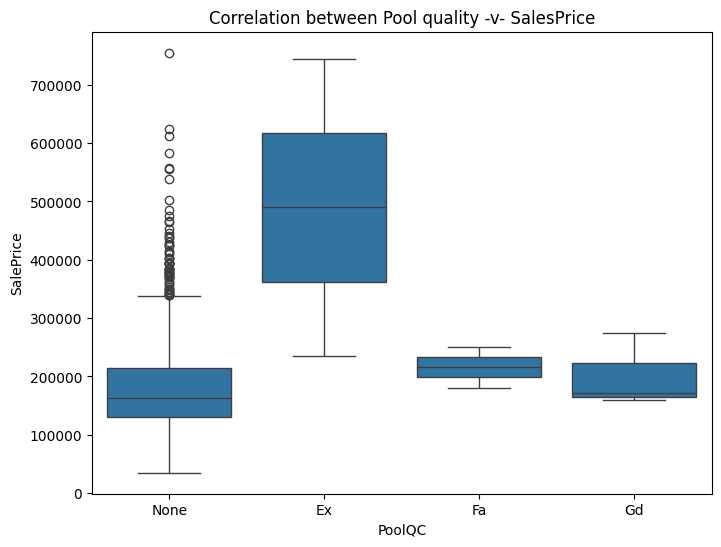

In [17]:
train_df.fillna({'PoolQC':'None'},inplace=True)

plt.figure(figsize=(8,6))
sns.boxplot(data=train_df, x='PoolQC', y='SalePrice')
plt.title('Correlation between Pool quality -v- SalesPrice')

plt.show()

Strong correlation between the pool quality and those houses that don't have pools with SalePrice

In [18]:
train_df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

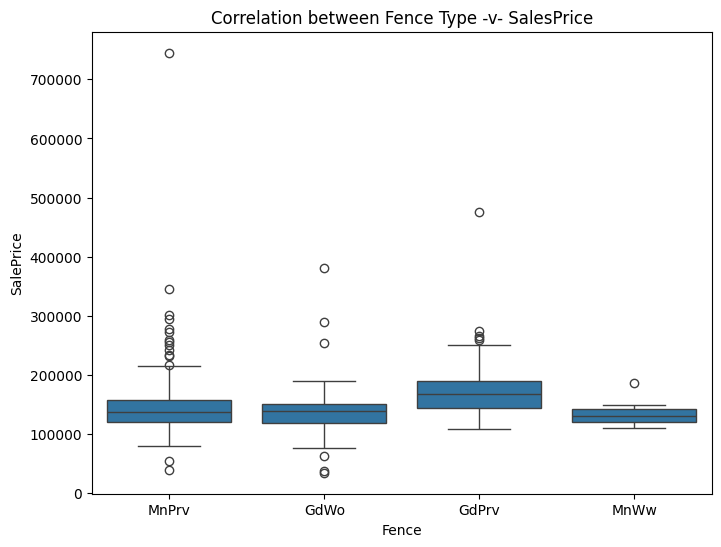

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(data=train_df, x='Fence', y='SalePrice')
plt.title('Correlation between Fence Type -v- SalesPrice')

plt.show()

Regarding how the type of fencing effects the SalePrice there does not seem to be much change in the price compared to the type of fence, so will drop the Fence column

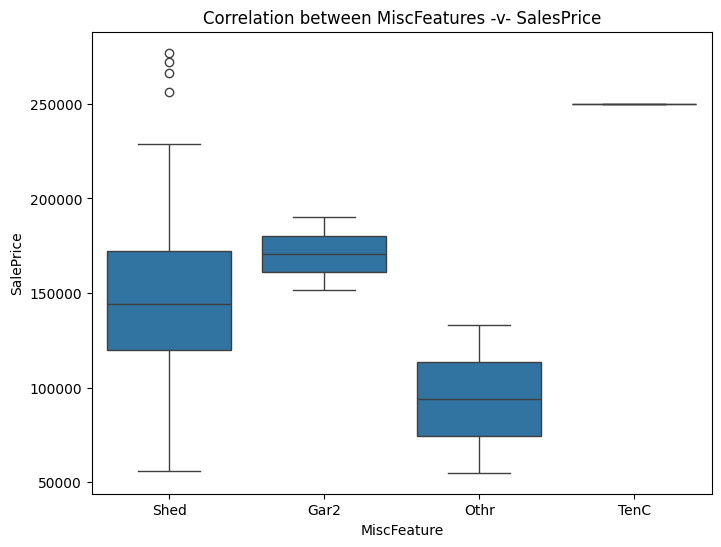

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(data=train_df, x='MiscFeature', y='SalePrice')
plt.title('Correlation between MiscFeatures -v- SalesPrice')

plt.show()

There appears to be an affect on House Sales Prices for Tennis Courts, but for the other features it is mixed so will drop this column.

#### Data Cleanup on the test Data
Lets look at the no of nulls in the training dataset

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1200 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallCond  

In [22]:
pd.set_option('display.max_rows', None)
missing_values = train_df.isnull().sum()
perc_of_Missing_values = train_df.isnull().sum() / len(train_df) * 100

missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
perc_of_Missing_values = perc_of_Missing_values[missing_values.index]

print("Column".ljust(20), "No of Missing".ljust(15), "Percentage Missing")
print("-" * 60)

for col in missing_values.index:
    print(f'{col.ljust(20)} {str(missing_values[col]).ljust(15)} {perc_of_Missing_values[col]:.2f}%')

Column               No of Missing   Percentage Missing
------------------------------------------------------------
MiscFeature          1405            96.30%
Alley                1368            93.76%
Fence                1178            80.74%
MasVnrType           871             59.70%
LotFrontage          259             17.75%
GarageYrBlt          81              5.55%
GarageFinish         81              5.55%
GarageQual           81              5.55%
GarageCond           81              5.55%
BsmtExposure         38              2.60%
BsmtFinType2         38              2.60%
BsmtQual             37              2.54%
BsmtCond             37              2.54%
BsmtFinType1         37              2.54%
MasVnrArea           8               0.55%


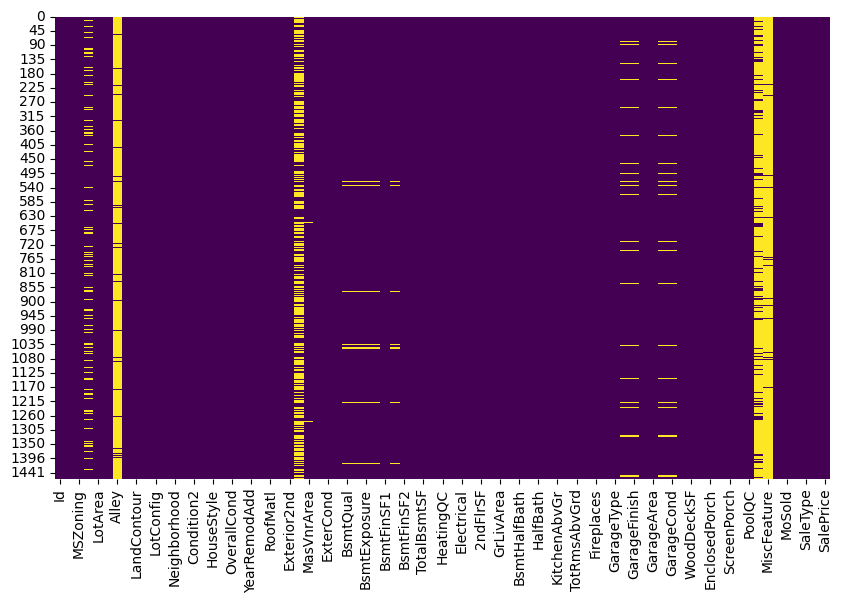

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [24]:
# Replace the missing values in the 'Int64' 'float64' columns with the median value in both the test_df and train_df datasets

for col in train_df.select_dtypes(include=['float64', 'int64']).columns:
    train_df.fillna({col: train_df[col].median()},inplace=True)
       
        
for col in test_df.select_dtypes(include=['float64', 'int64']).columns:
    test_df.fillna({col: test_df[col].median()}, inplace=True)

# Replace the categorical columns with nulls with the most frequent value (mode
for col in train_df.select_dtypes(include=['object']).columns:
    train_df.fillna({col : train_df[col].mode()[0]}, inplace=True)

for col in test_df.select_dtypes(include=['object']).columns:
    test_df.fillna({col : test_df[col].mode()[0]}, inplace=True)
        

In [25]:
train_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

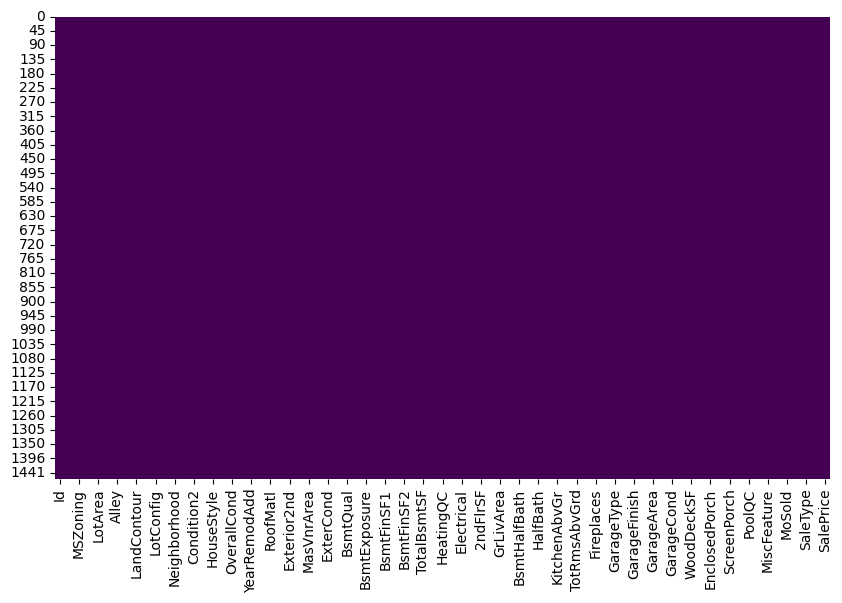

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.show()

##### Now prepare the cleansed data for learning

In [31]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice']) 


y = train_df['SalePrice']
train_df.drop(columns=['SalePrice'], inplace=True)
X = train_df
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)

KeyError: 'SalePrice'

In [27]:
# Now get the rest of the data ready for training and testing

from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder


# le=LabelEncoder()
# for col in train_df.select_dtypes(include=['object']).columns:
#     # Fit on the train set and apply the same transformation to both train and test
#     train_df[col] = le.fit_transform(train_df[col])
#     # Confirming that only known categories are present in test_df
#     test_df[col] = test_df[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)


#With the categorical columns we will apply the get dummies method on them
#Label encode the categorical column MSSubClass
columns_to_dummy = []
columns_to_dummy2 = []
# columns_to_dummy = [
#     'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
#     'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
#     'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
#     'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 
#      'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
#     'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
#     'PoolQC', 'SaleCondition','SaleType'
# ]
for col in train_df.select_dtypes(include=['object']).columns:
    columns_to_dummy.append(col)

train_df = pd.get_dummies(train_df,columns=columns_to_dummy, drop_first=True)

for col in test_df.select_dtypes(include=['object']).columns:
    columns_to_dummy2.append(col)
test_df = pd.get_dummies(test_df,columns=columns_to_dummy, drop_first=True)

# for col in columns_to_dummy:
#     X[col] = le.fit_transform(X[col])





In [29]:
# Now split the data into our train and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=43)

#Convert the numerical columns into a standard scale of a median of 0 and a std of 1
sc=StandardScaler()

# Apply scaling
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)




ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Condition2_RRAe
- Condition2_RRAn
- Condition2_RRNn
- Electrical_Mix
- Exterior1st_ImStucc
- ...


In [ ]:
 
#X_train.head(20)


In [ ]:
# Training our model using LinearRegression method
from sklearn.ensemble import StackingRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor,HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.svm import SVR,NuSVR

#import cupy as cp


#model = LinearRegression()

#dtrain = xgb.DMatrix(X_train, label=y_train)
#dtest = xgb.DMatrix(X_val, label=y_val)

# X_train = X_train.astype({col: 'int64' for col in X_train.select_dtypes(include=['bool']).columns})
# X_val = X_val.astype({col: 'int64' for col in X_val.select_dtypes(include=['bool']).columns})

# X_train_gpu = cp.array(X_train.values)
# X_val_gpu = cp.array(X_val.values)
# y_train_gpu = cp.array(y_train.values)
# y_val_gpu = cp.array(y_val.values)

# X_train_np = cp.asnumpy(X_train_gpu)
# y_train_np = cp.asnumpy(y_train_gpu)
# X_val_np = cp.asnumpy(X_val_gpu)
# y_val_np = cp.asnumpy(y_val_gpu) 

base_models = [
('bagging', BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42),n_estimators=500,n_jobs=-1)),
('et', ExtraTreesRegressor(n_estimators=500,n_jobs=-1)),
('knn', KNeighborsRegressor(n_neighbors=5,n_jobs=-1)),
('Nusvr', NuSVR(nu=0.7,C=1.0,kernel='rbf',verbose=True)),
('xgb', XGBRegressor(n_estimators=500, learning_rate=0.1, n_jobs=-1, max_depth=10,reg_alpha=0.5,reg_lambda=1,verbose=1)),
('catboost', CatBoostRegressor(iterations=500, depth=10, thread_count=-1, learning_rate=0.1, verbose=100)),
('hgbr',HistGradientBoostingRegressor(max_iter=500, random_state=42,verbose=1)),
('mlp', MLPRegressor(hidden_layer_sizes=(100,100), max_iter=500, random_state=42, verbose=True)),
('ridge', Ridge(alpha=1.0)),
('lasso', Lasso(alpha=0.1)) ]

stacked_model = StackingRegressor(
                                    estimators=(base_models),
                                    final_estimator=LinearRegression(),
                                    cv=5)




stacked_model.fit(X_train,y_train)
y_pred = stacked_model.predict(X_val)
#model.fit(X_train_gpu, y_train_gpu, eval_set=[(X_val_gpu, y_val_gpu)],  verbose=True )

#predictions = model.predict(X_val_gpu)

In [ ]:
#Test the accuracy score and what are the best parameters to use in XGBRegressor
# from sklearn.model_selection import RandomizedSearchCV

# param_grid = {
#                 'learning_rate':[0.01, 0.05, 0.1],
#                 'n_estimators':[100,500, 1000],
#                 'max_depth':[3,5,7,10],
#                 'subsample':[0.5,0.6,0.7,0.8,0.9,1.0],
#                 'colsample_bytree':[0.3,0.4,0.5,0.6],
#                 'reg_alpha':[0.1,0.5,1],
#                 'reg_lambda':[0.1,1,10]
#                  }
# X_train_np = cp.asnumpy(X_train_gpu)
# y_train_np = cp.asnumpy(y_train_gpu)
# X_val_np = cp.asnumpy(X_val_gpu)
# y_val_np = cp.asnumpy(y_val_gpu)          

# Random_search = RandomizedSearchCV(estimator=model,  param_distributions=param_grid, cv=5, n_iter=50,verbose=3, random_state=42, n_jobs=-1, scoring='neg_mean_squared_error')
# Random_search.fit(X_train_np, y_train_np,eval_set=[(X_val_np, y_val_np)])


# print('Best parameters:', Random_search.best_params_)
# print('Best Score:', Random_search.best_score_)

In [ ]:
#Plot the learning curve rate
# train_sizes, train_scores, test_scores = learning_curve(
#     XGBRegressor(**Random_search.best_params_), X_train, y_train, cv=5, scoring='neg_mean_squared_error',
#     train_sizes = [0.01, 0.1, 1], n_jobs=-1)


# train_scores_mean = np.mean(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)

# plt.plot(train_sizes, -train_scores_mean, label="Training Error")
# plt.plot(train_sizes, -test_scores_mean, label="Validation Error")
# plt.title("Learning rate Curve")
# plt.xlabel('Training Set Size')
# plt.ylabel('Error')
# plt.legend()
# plt.grid(True)
# plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


#predictions_np = cp.asnumpy(y_pred)

mse = mean_squared_error(y_val, y_pred)
r2_train_stacking = r2_score(y_val, y_pred)
print(f'The MSE of training this model on xgboost is {mse:.2f}')
print(f'R2 for the training model {r2_train_stacking}')


In [ ]:
max_lines = (lambda X_train: X_train.shape[0])(X_train)

In [ ]:
print (max_lines)

In [ ]:
test_df.isnull().sum()

In [ ]:
max_lines = (lambda test_df: X_train.shape[0])(test_df)
print(max_lines)

In [ ]:
test_predictions_stacking = stacked_model.predict(X_test_scaled)